In [1]:

using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
using BSON: @save, @load
using ProgressMeter

# include("leap_frog_definitions.jl")
# include("PSS_Definitions_Dimer_X.jl")
include("orbit_plots_leapfrog_dimer.jl")

plot_orbits_leapfrog_lab (generic function with 1 method)

# Escapes for $H=.25$
## Brandon Behring


## Purpose of Document
The goal of this document is to show the behavior of trajectories on the Energy surfaces for $H=.25#

## Features of the new coordinates
* The new "dimer" coordinates resolve twp different time scales
* can naturally see the three stable fixed points representing the limit when dimers 'merge'
* two unstable fixed points, left-over from instabilities of the three-vortex problem?
* the braiding and walkabouts are now clearly separated
* the walkabouts stop existing around h=.2, perhaps now the leapfrogging orbits and now escape the stochastic region?


## The 'Dimer' Hamiltonian
Consider four vortices with $\Gamma_1=\Gamma_2=1$ and $\Gamma_3=\Gamma_4=-1$  located at $\pmb{r}_i=(x_i,y_i)$, the Hamiltonian can be written down explicitly as
\begin{equation}
\label{Ham}
   \begin{split}
\mathcal{H}&=-\frac{1}{4\pi} \log |\pmb{r}_4-\pmb{r}_3 |^2-\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_2 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_3 |^2\\
&+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_3 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_4 |^2+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_4 |^2.
\end{split}
\end{equation}


We wish to dimerize the two liked signed vortices. Switching to the center of vorticity of 1 and 2 of the positive vortices and 3 and 4  of the negative vortices 
\begin{equation}
\label{center}
\begin{aligned} 
\pmb{R}_{+}&=\frac{ \pmb{r}_1+\pmb{r}_2}{2}=(X_{+},Y_{+}),\\
\pmb{r}_{+}&=\pmb{r}_1-\pmb{r}_2=(x_{+},y_{+}).\\
\pmb{R}_{-}&=\frac{ \pmb{r}_3+\pmb{r}_4}{2}=(X_{-},Y_{-})\\
\pmb{r}_{-}&=\pmb{r}_3-\pmb{r}_4=(x_{-},y_{-}).
\end{aligned}
\end{equation} 
Note that since we have net circulation of zero, $\{ Q, P \}=\sum_i \Gamma_i=0$, the moment of vorticity is
\begin{equation}
\pmb{M}=(Q, P)=\sum_{i=1}^4 \Gamma_i \pmb{r}_i=\pmb{r}_1+\pmb{r}_2-(\pmb{r}_3+\pmb{r}_4)=2\left(\pmb{R}_{+} -\pmb{R}_{-}\right)
\end{equation}
has two independent conserved components, the quantities $Q$ and $P$.


We can make a new canonical system by taking
\begin{equation}
\begin{aligned}
q_1&= \frac{1}{\sqrt{2}}\left(x_1-x_2\right), &
q_2&=+\frac{1}{\sqrt{2}}\left(x_3-x_4\right),\\
p_1&=\frac{1}{\sqrt{2}} \left(y_1-y_2\right), &
p_2&=-\frac{1}{\sqrt{2}}\left(y_3-y_4\right),
\end{aligned}
\label{dimer variables}
\end{equation}

With this choice, the Poisson brackets are now normalized, i.e.  $\{q_i,p_j\}=\delta_{ij}$. This makes keep track of our canonical transformations simpler and allows us to define our ODEs just by the Hamiltonian.

 In the canonical variables, the Hamiltonian becomes,  to stick with staying in the reference frame of Aref\cite{ArefEckhardt} we will later choose $\pmb{M}=(0,2)$.
 \begin{equation}
\begin{split}
\label{Dimer_Hamiltonian}
H(q_1,q_2,p_1,p_2)&=
-\frac{1}{4\pi} \log \left(p_1^2+q_1^2\right) 
-\frac{1}{4\pi} \log \left(p_2^2+q_2^2\right) \\
&+ \frac{1}{4\pi} \log \left(2-2\sqrt{2}\left(p_1+p_2\right)+\left(p_1+p_2\right){}^2+\left(q_1-q_2\right)^2\right) \\
&+ \frac{1}{4\pi} \log \left(2+2\sqrt{2}\left(p_1+p_2\right)+\left(p_1+p_2\right){}^2+\left(q_1-q_2\right)^2\right)\\
&+ \frac{1}{4\pi} \log \left(2-2\sqrt{2}\left(p_1-p_2\right)+\left(p_1-p_2\right){}^2+\left(q_1+q_2\right)^2\right)\\
&+ \frac{1}{4\pi} \log \left(2+2\sqrt{2}\left(p_1-p_2\right)+\left(p_1-p_2\right){}^2+\left(q_1+q_2\right)^2\right)
\end{split}
\end{equation}

The initial coordinates for the leap frogging motion would be $q_1=q_2=0$ and $p_1=p_2$.

## The 'Aref-Eckhardt' Hamiltonian

The for of the dimer Hamiltonian suggest we look at the following transformation
\begin{equation}
\begin{aligned}
Q_1&=\frac{1}{\sqrt{2}} \left(q_1+q_2\right), &
Q_2&=\frac{1}{\sqrt{2}} \left(q_1-q_2\right),\\
P_1&=\frac{1}{\sqrt{2}} \left(p_1+p_2\right), &
P_2&=\frac{1}{\sqrt{2}} \left(p_1-p_2\right),
\end{aligned}
\label{aref_variables}
\end{equation}

which leads to Hamiltonian
 \begin{equation}
\begin{split}
\label{Aref_Hamiltonian}
4\pi H(Q_1,Q_2,P_1,P_2)&=
\log \left((Q_1+Q_2)^2+(P_1+P_2)^2\right)
+\log \left((Q_1-Q_2)^2+(P_1-P_2)^2\right)\\
&-\log \left(Q_1^2+(P_2-1)^2\right)
-\log\left(Q_1^2+(P_2+1)^2\right)\\
&-\log \left(Q_2^2+(P_1-1)^2\right)
-\log \left(Q_2^2+(P_1+1)^2\right).\\
\end{split}
\end{equation}

We often dealt with $\mathcal{H}=8 e^{-2\pi}$ given by
\begin{equation}
\label{Brandon_Aref_Hamiltonian}
\mathcal{H}(Q_1,Q_2,P_1,P_2)=\frac{1}{2} \sqrt{ \frac{\left((Q_1+Q_2)^2+(P_1+P_2)^2\right)\left((Q_1-Q_2)^2+(P_1-P_2)^2\right)}
{\left(Q_1^2+(P_2-1)^2\right)\left(Q_1^2+(P_2+1)^2\right)\left(Q_2^2+(P_1-1)^2\right) \left(Q_2^2+(P_1+1)^2\right)}}
\end{equation}

##### For H=.25

Loading data and making hit tables-this will be improved. Right now this approach has a lot of vestigal features that can be cleaned up.

In [2]:
@load "Hit_for_escape_data0_2500000000000_1500_3375.bson" SAVE_DATA
Q_n,P_n=SAVE_DATA["never"]
Q_0,P_0=SAVE_DATA["zero"]
Q_1,P_1=SAVE_DATA["one"]
Q_2,P_2=SAVE_DATA["two"]
Q_3,P_3=SAVE_DATA["three"]
Q_4,P_4=SAVE_DATA["four"];
Q_5,P_5=SAVE_DATA["five"];


Plotting hits before escape- need to add legend. Below I break down each hit just for clarity. I will not do this for the other examples.

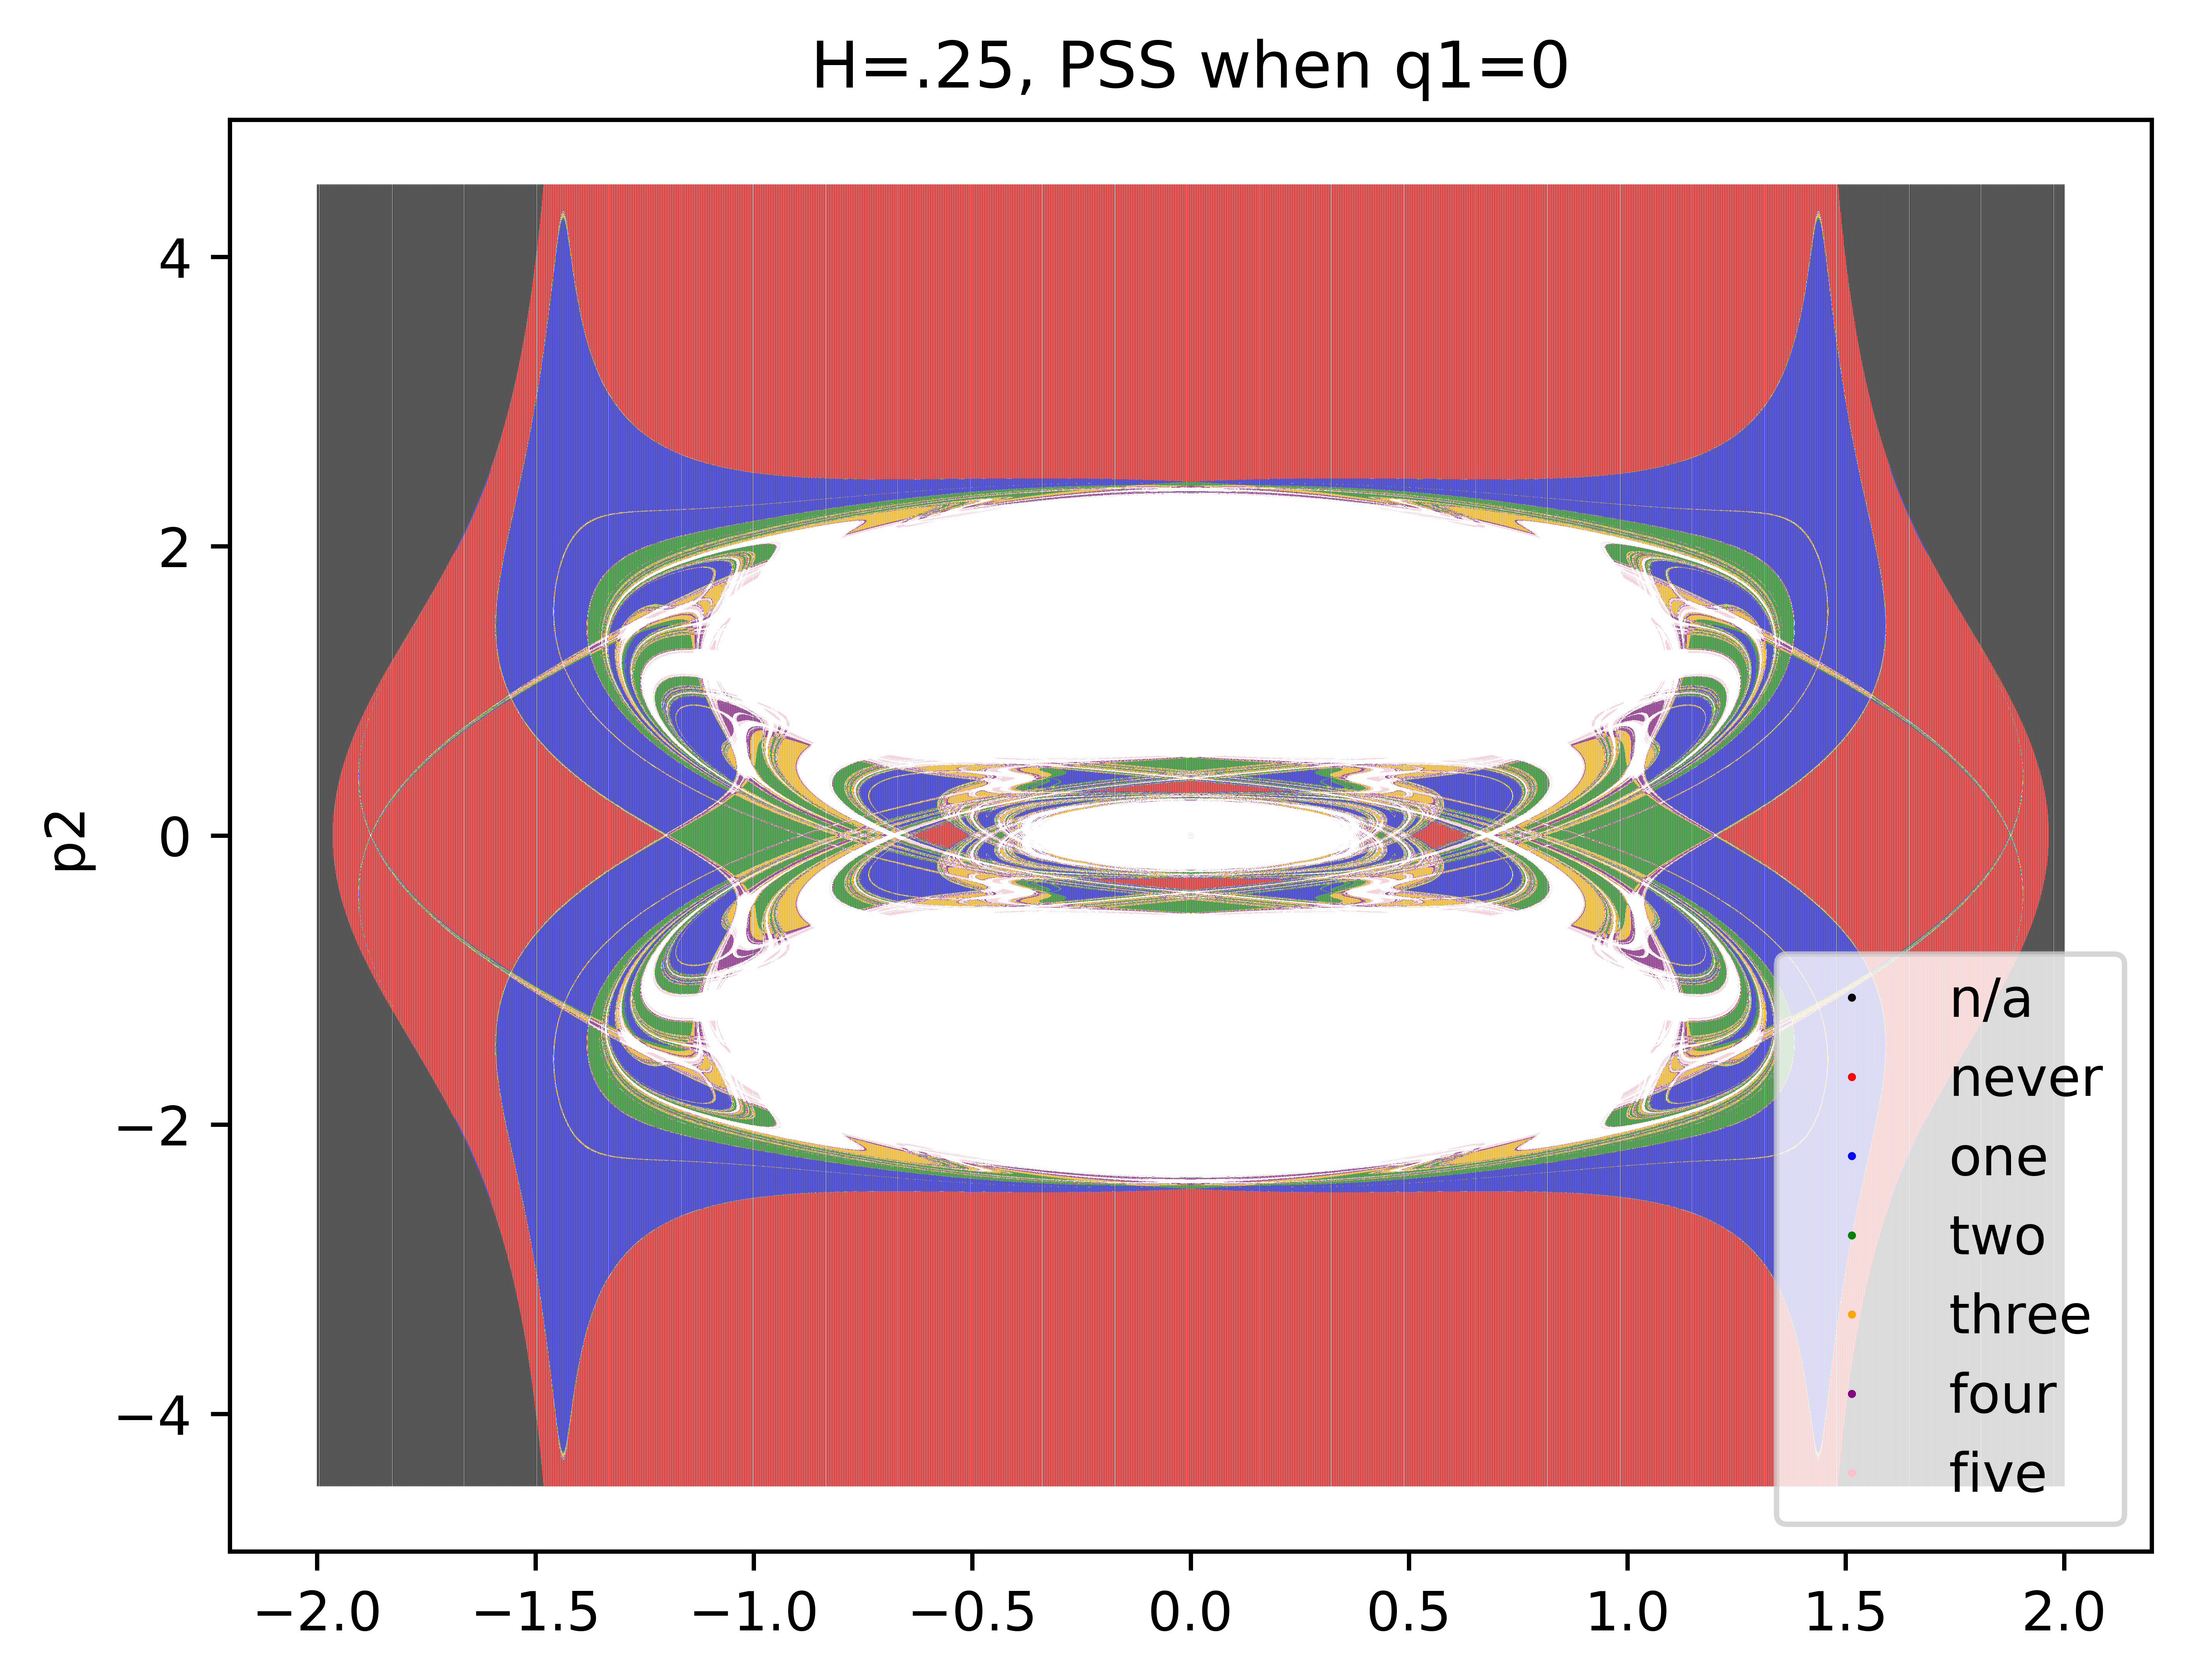

In [3]:
figure(dpi=1000)
plot(Q_n[1],P_n[1], ".",markersize=.01,c=:black,label="n/a")
plot(Q_0[1],P_0[1], ".",markersize=.01,c=:red,label="never")
plot(Q_1[1],P_1[1], ".",markersize=.01,c=:blue,label="one")
plot(Q_2[1],P_2[1], ".",markersize=.01,c=:green,label="two")
plot(Q_3[1],P_3[1], ".",markersize=.01,c=:orange,label="three")
plot(Q_4[1],P_4[1], ".",markersize=.01,c=:purple,label="four")
plot(Q_5[1],P_5[1],".",markersize=.01,c=:pink,label="five")

legend(loc="lower right",markerscale=100)


plot(Q_n,P_n,",",c=:black,label="n/a")
plot(Q_0,P_0,",",c=:red,label="never")
plot(Q_1,P_1,",",c=:blue,label="one")
plot(Q_2,P_2,",",c=:green,label="two")
plot(Q_3,P_3,",",c=:orange,label="three")
plot(Q_4,P_4,",",c=:purple,label="four")
plot(Q_5,P_5,",",c=:pink,label="five")
# xlabel("q2")
ylabel("p2")
title("H=.25, PSS when q1=0");

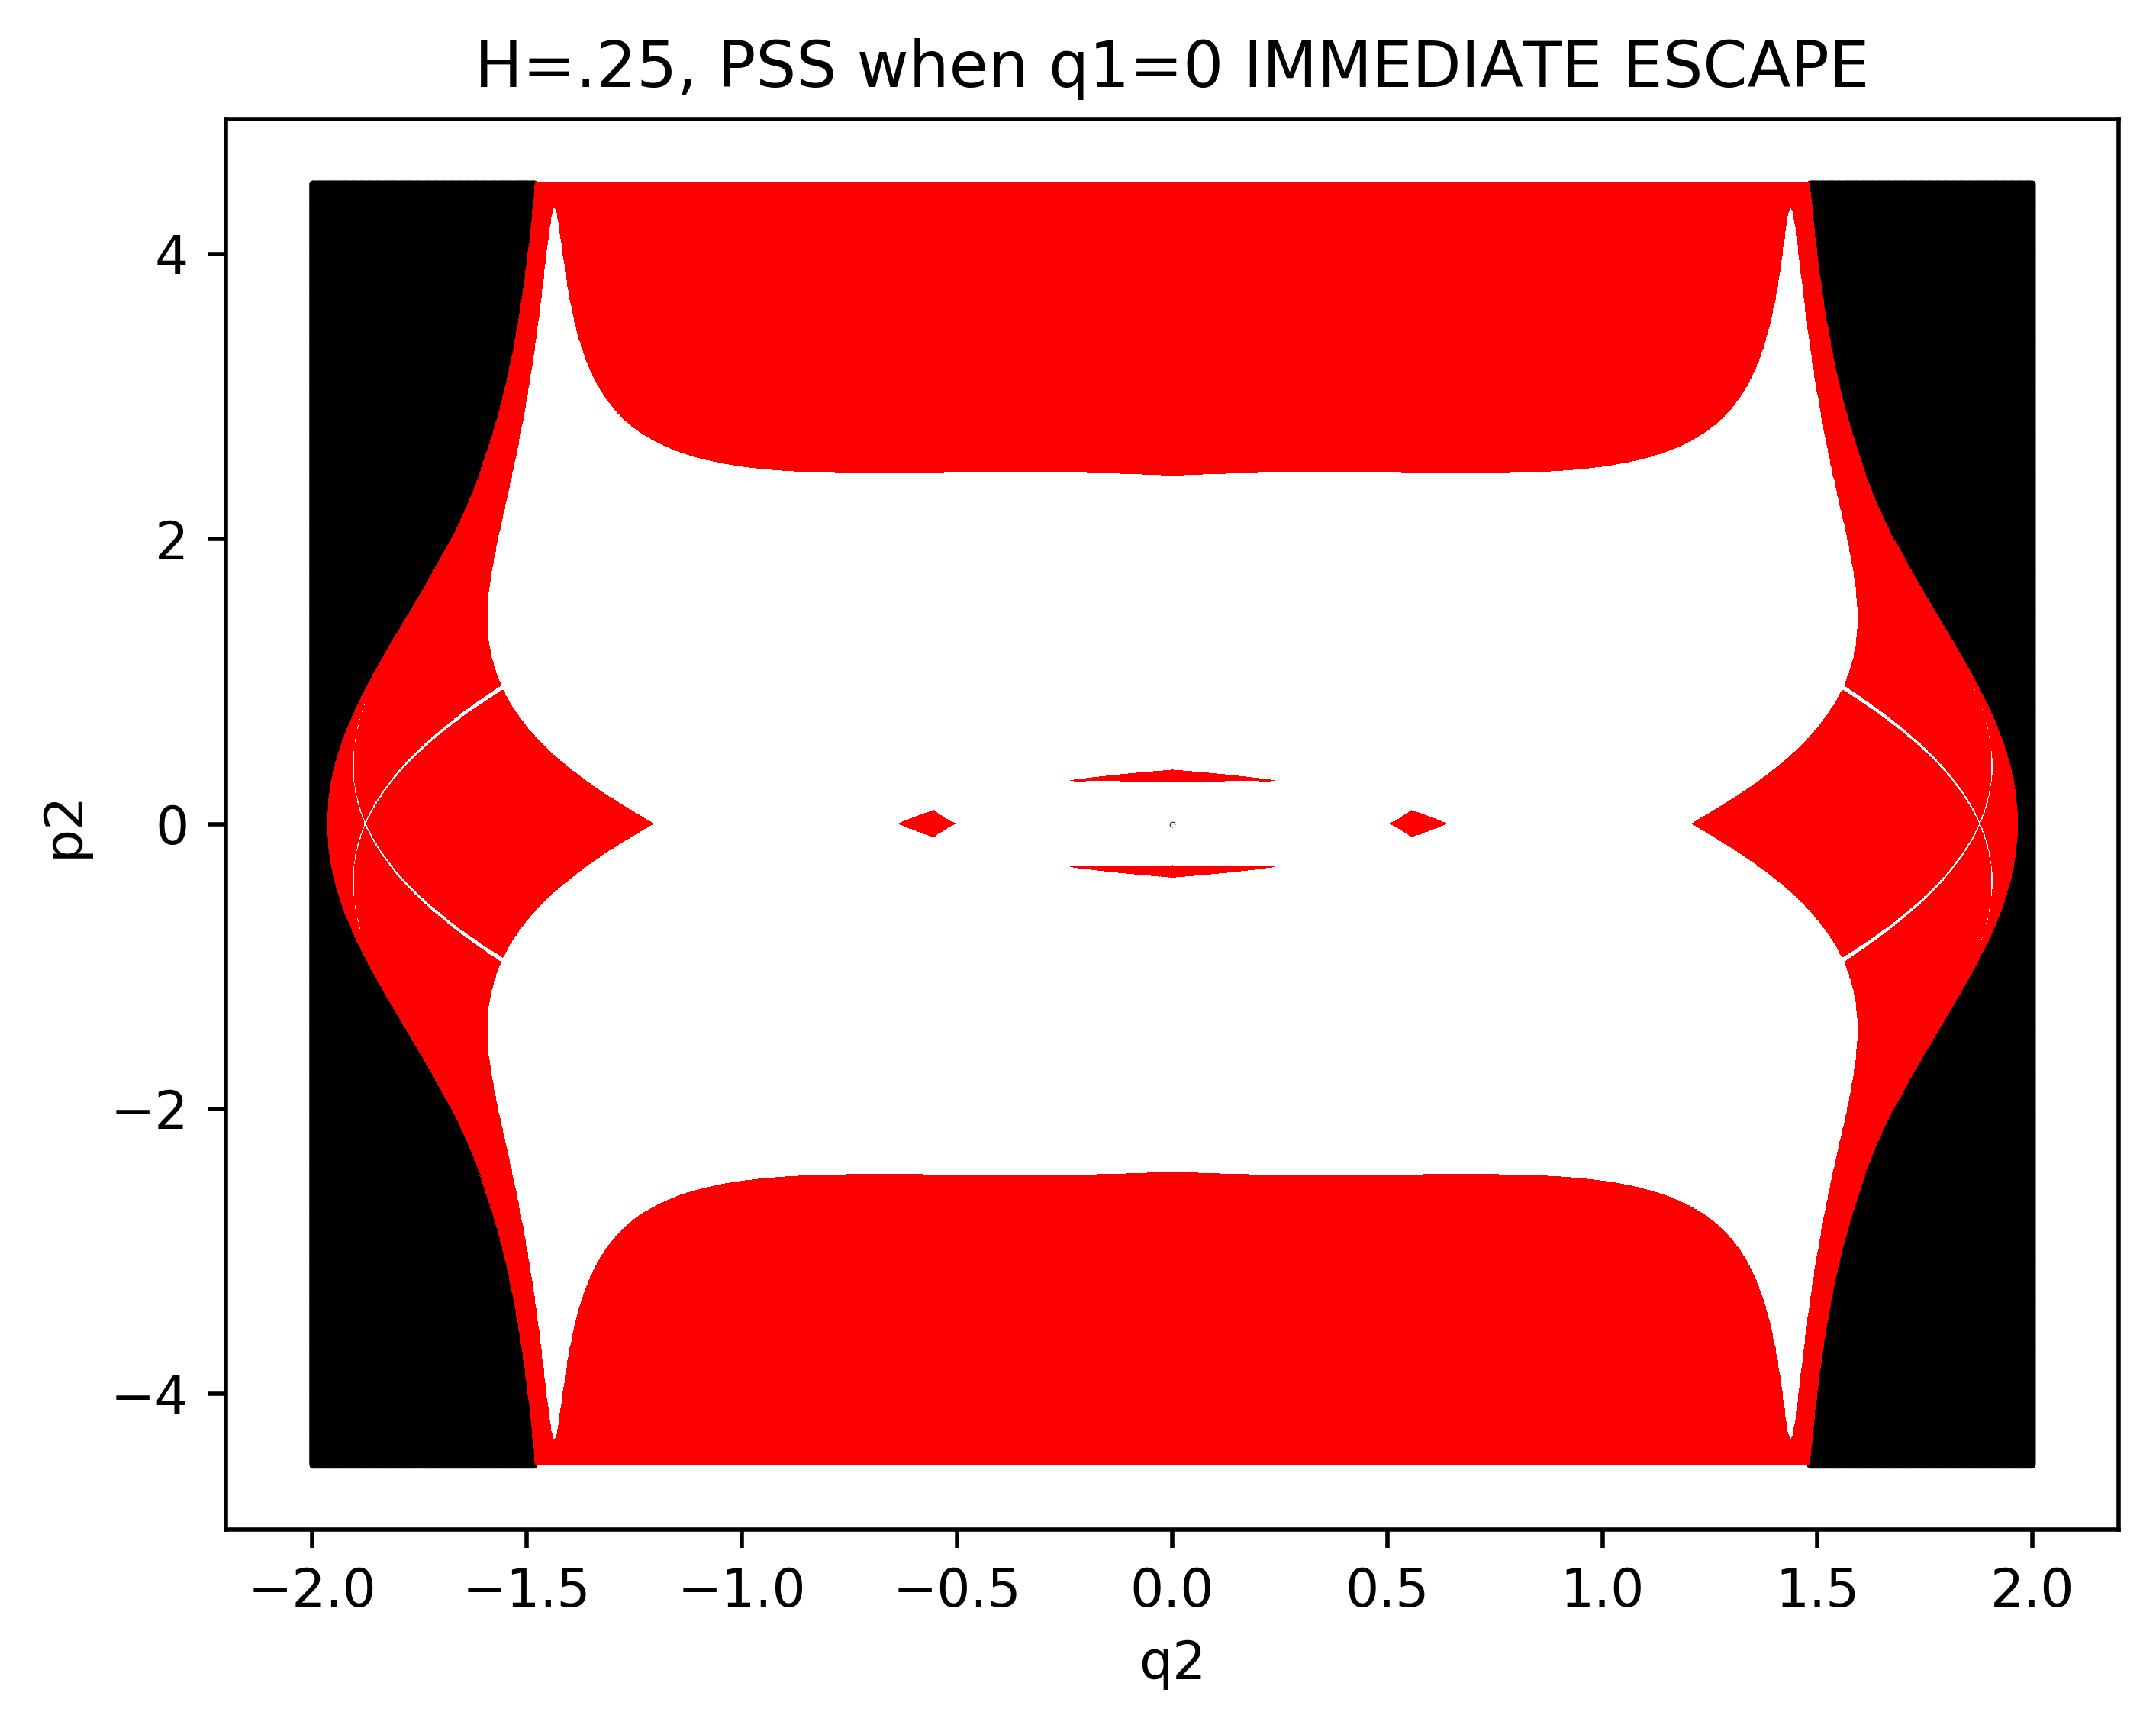

In [4]:
figure(dpi=500)

plot(Q_n,P_n, ".",markersize=.1,c="k")
plot(Q_0,P_0, ",", c=:red)

xlabel("q2")
ylabel("p2")
title("H=.25, PSS when q1=0 IMMEDIATE ESCAPE");

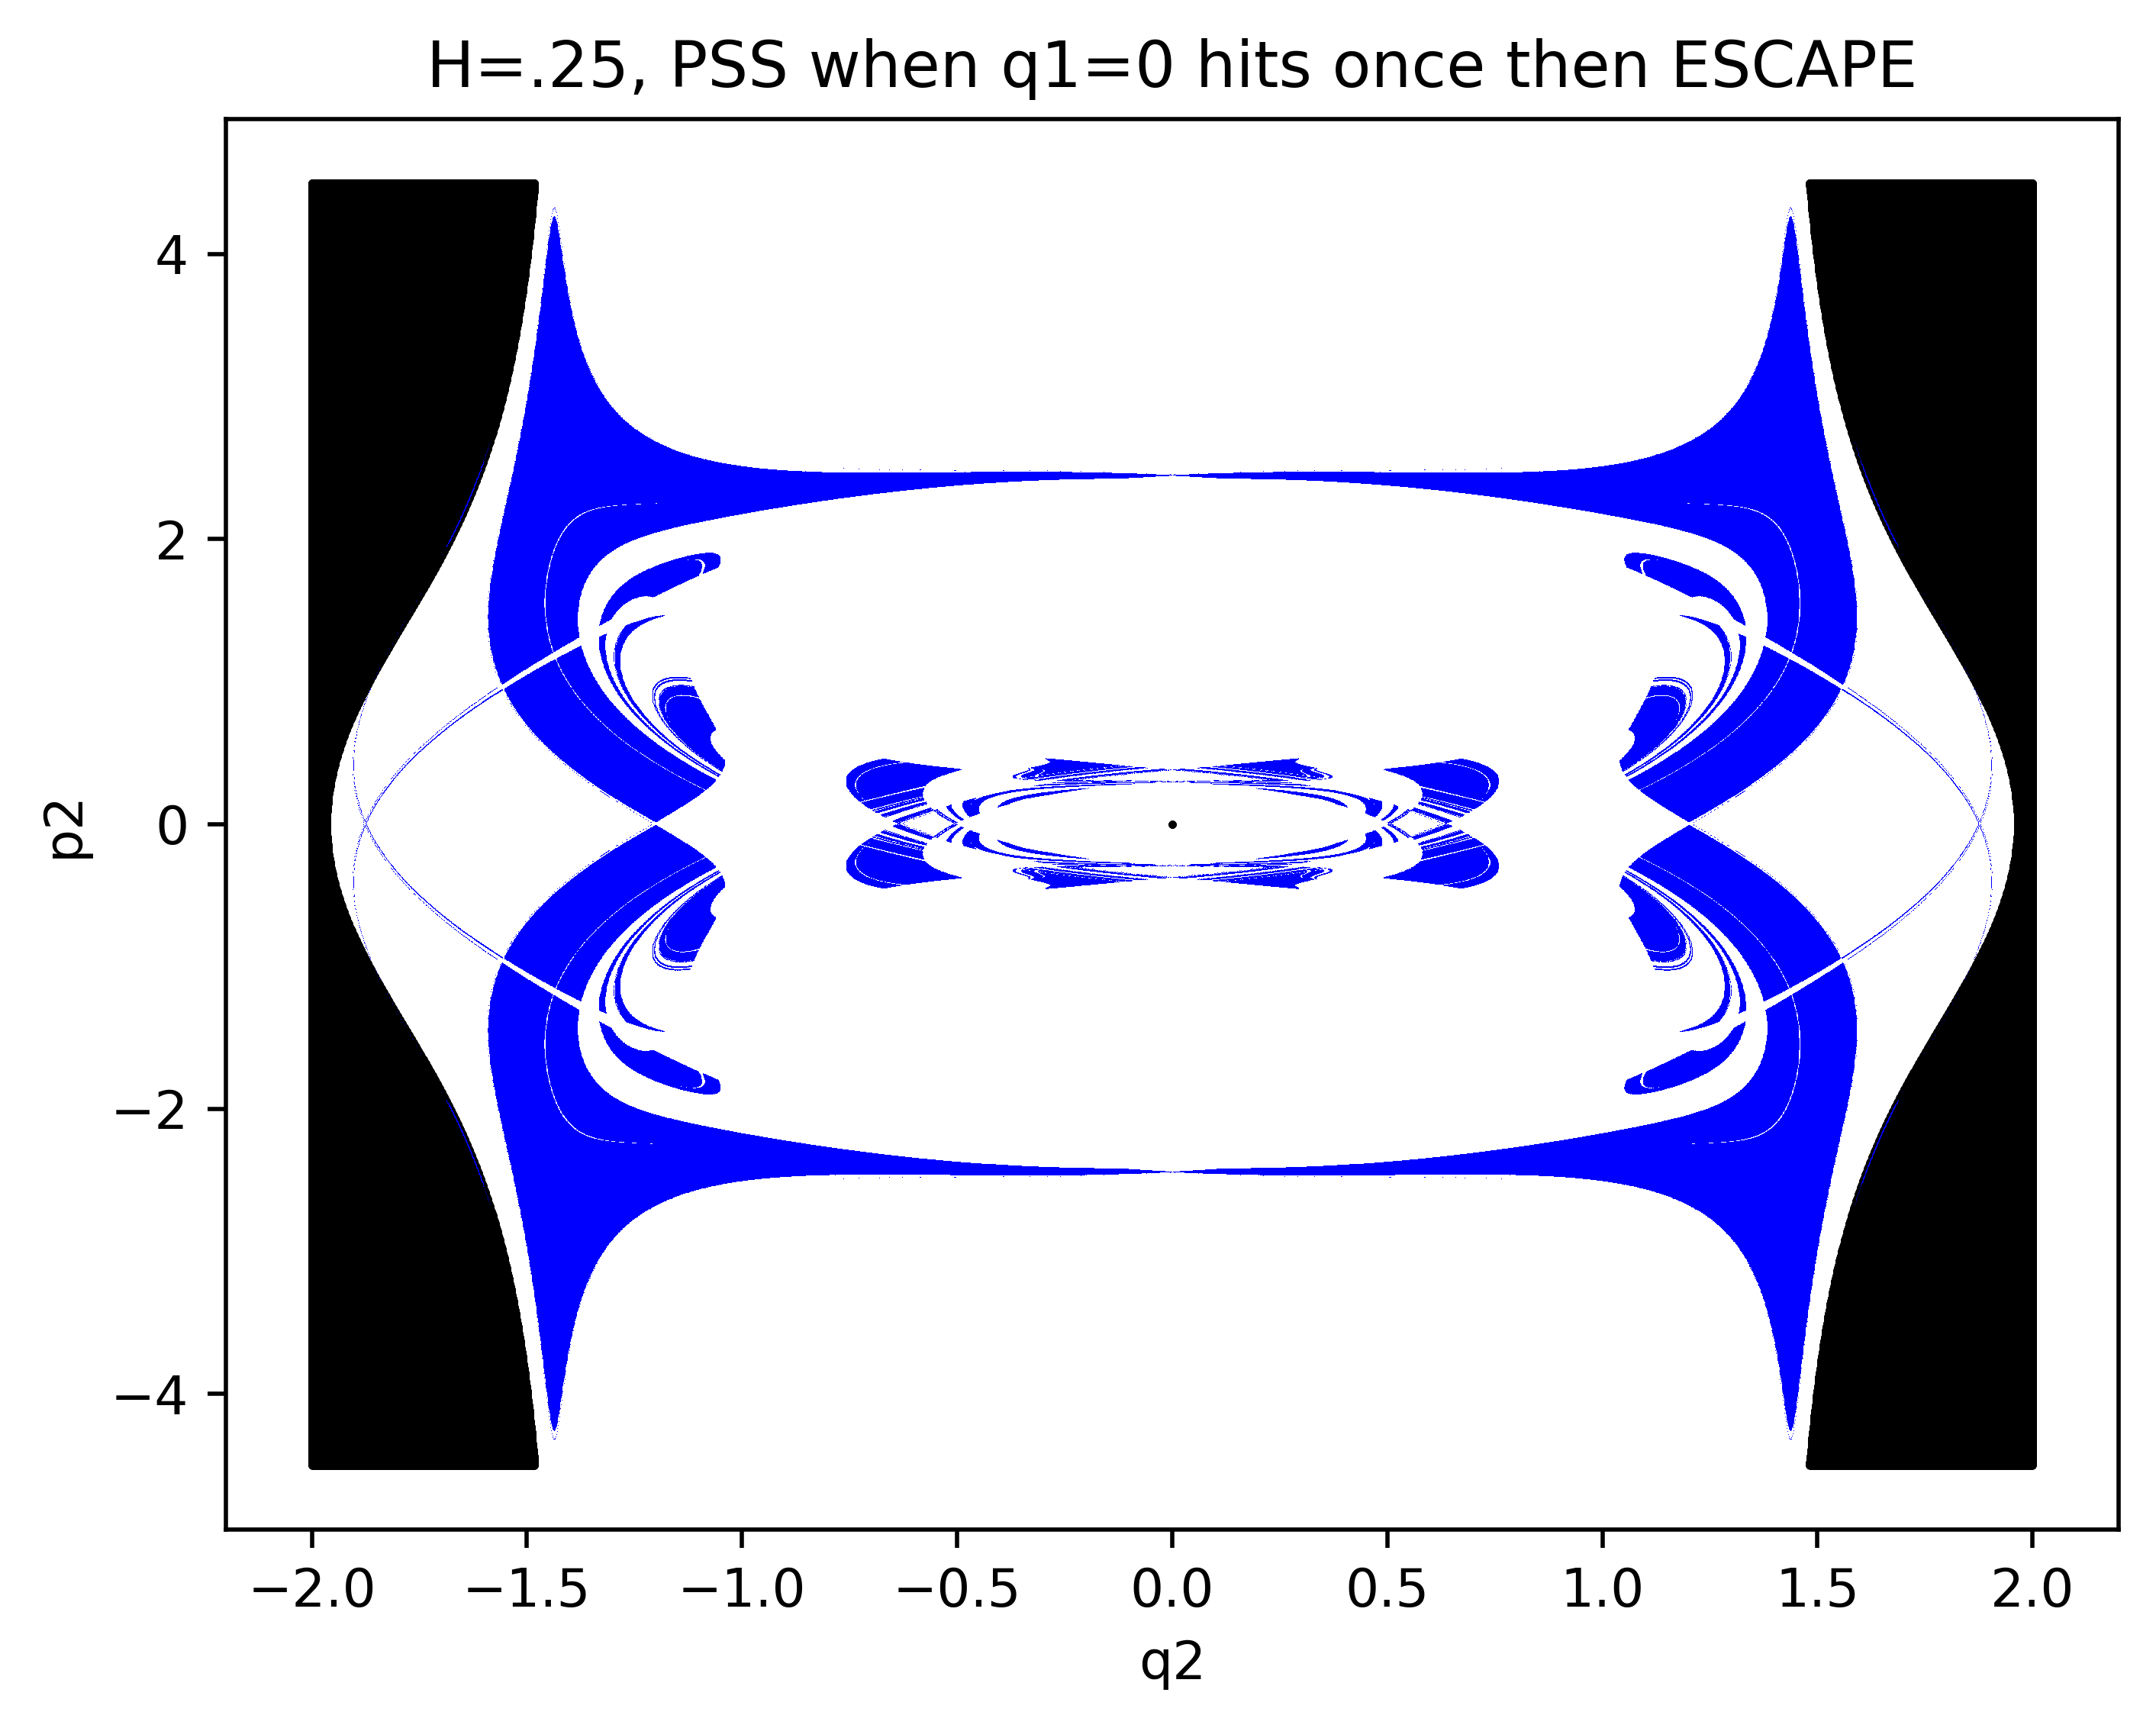

In [5]:
figure(dpi=500)

plot(Q_n,P_n, ".",markersize=1,c="k")
plot(Q_1,P_1, ",", c=:blue)
xlabel("q2")
ylabel("p2")
title("H=.25, PSS when q1=0 hits once then ESCAPE");


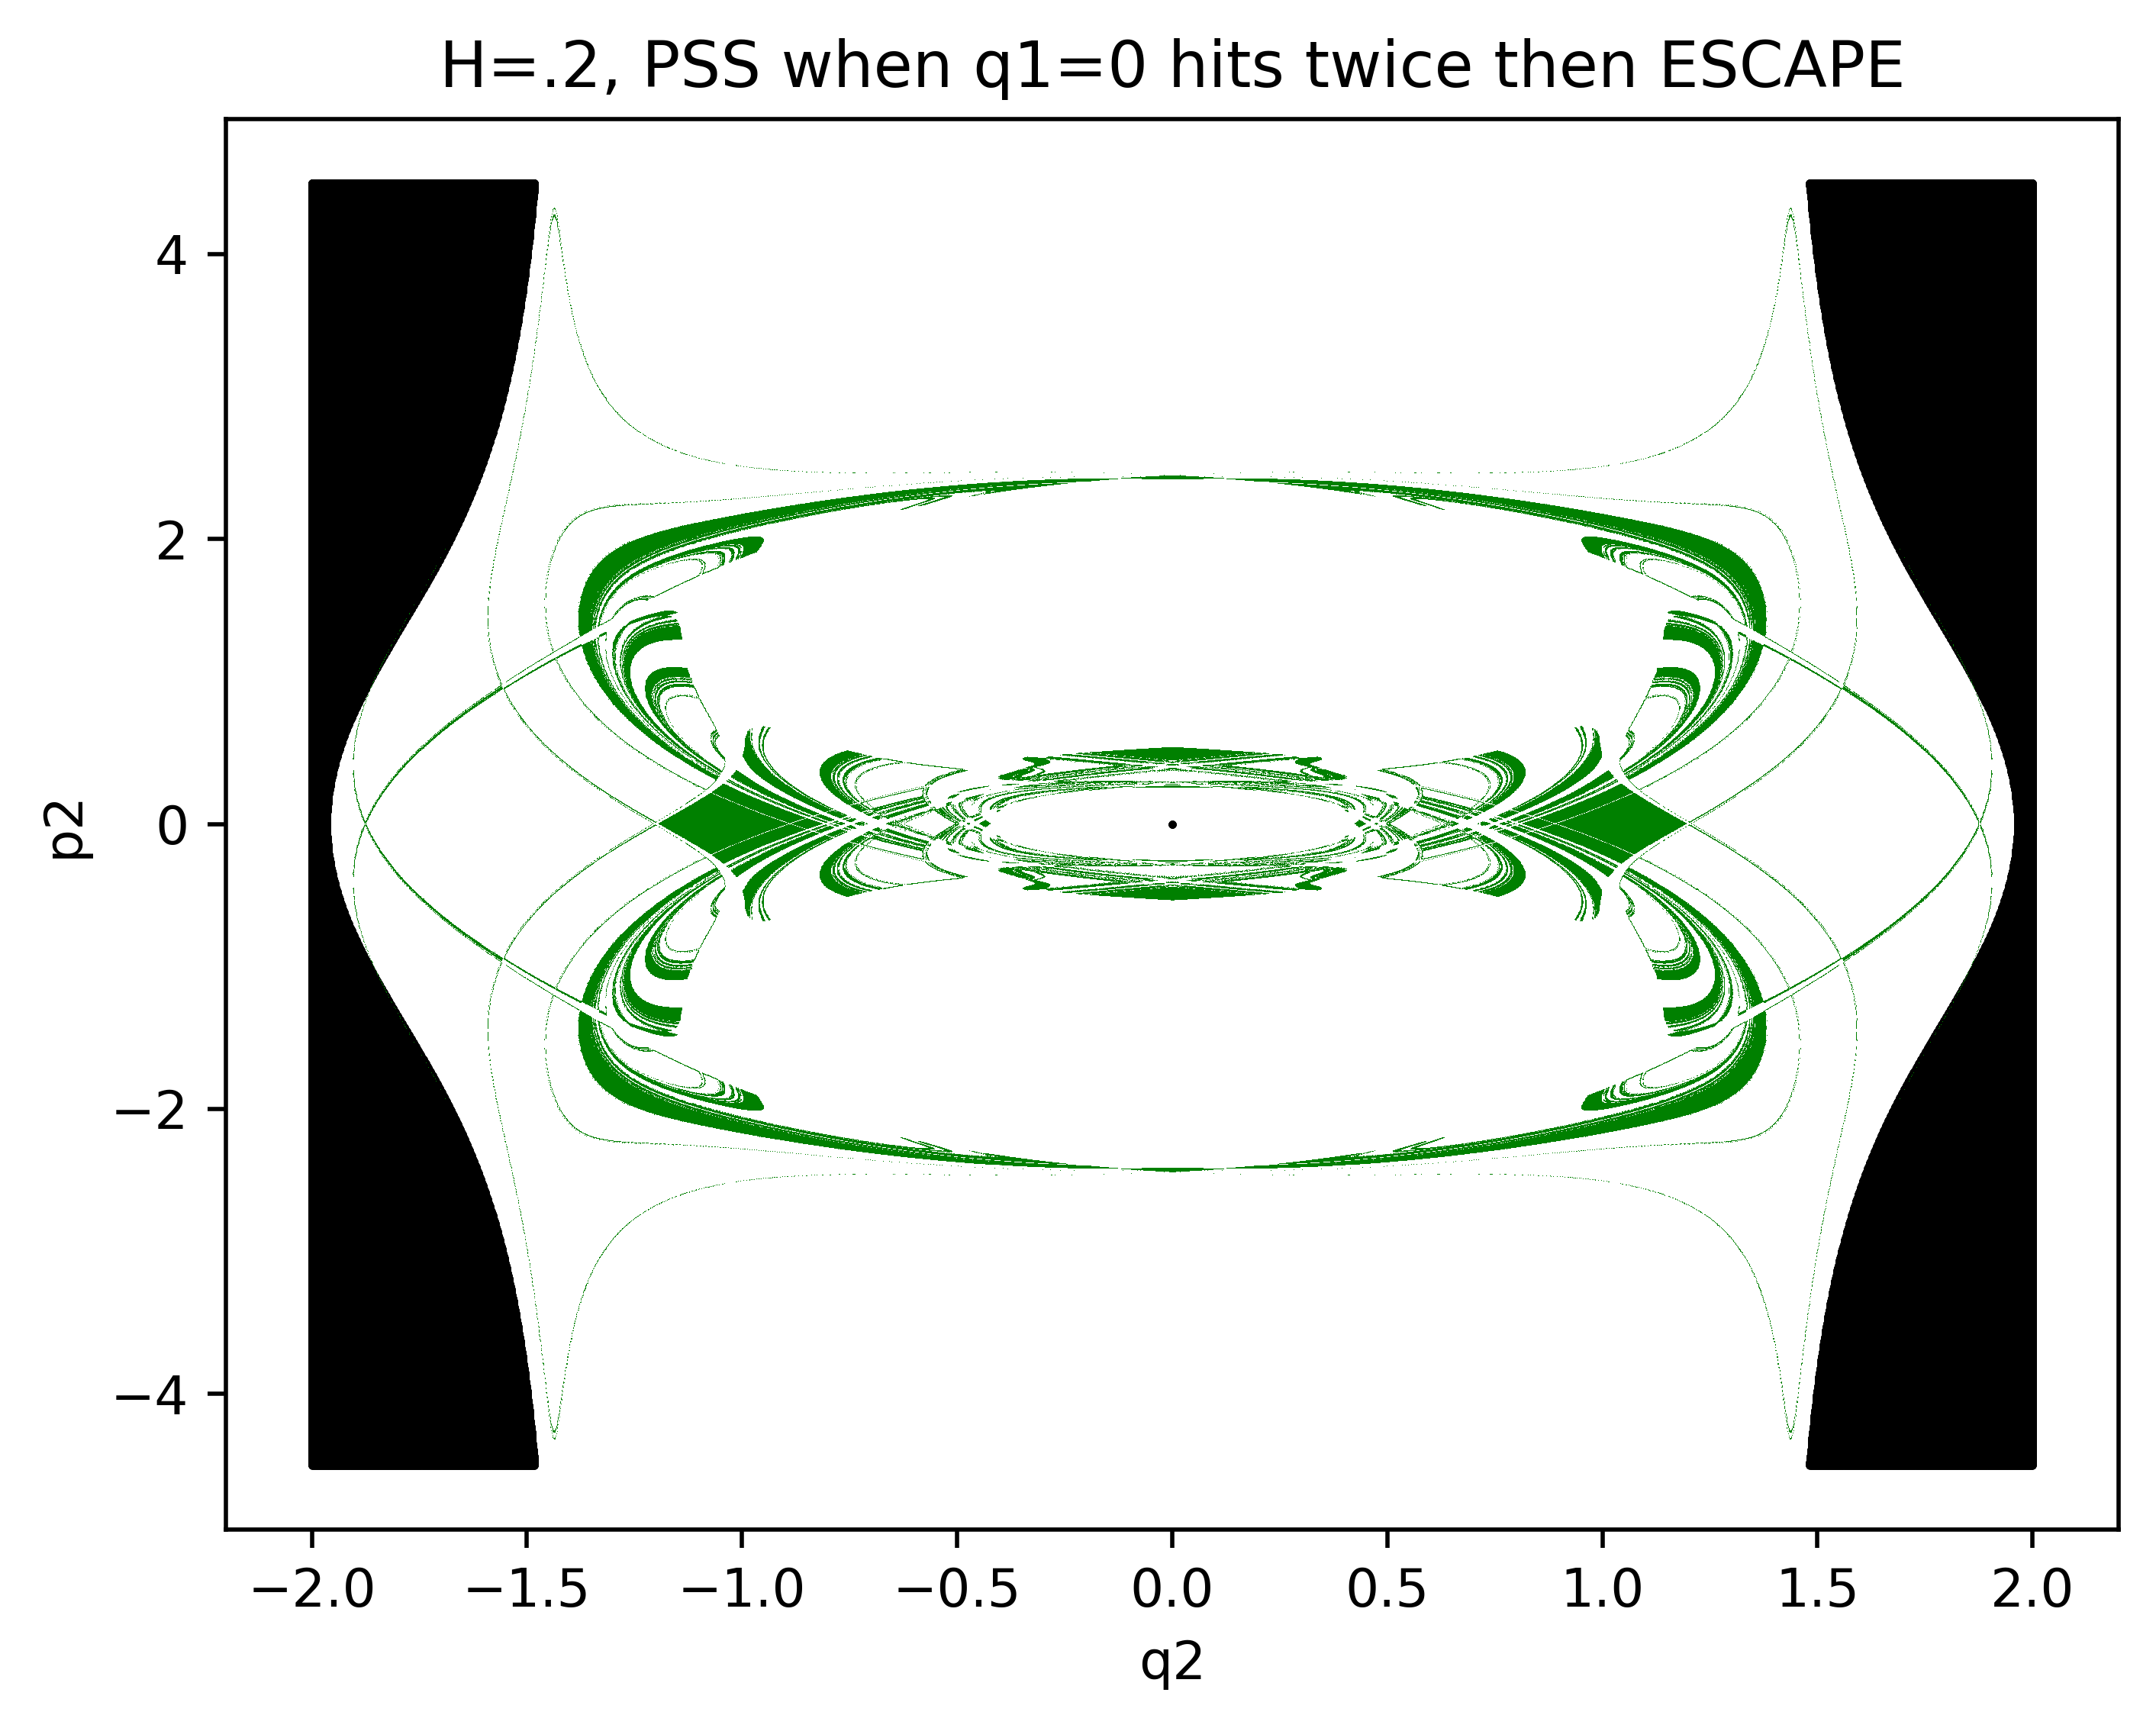

In [6]:
figure(dpi=500)
plot(Q_n,P_n, ".",markersize=1,c="k")
plot(Q_2,P_2, ",", c=:green)
xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits twice then ESCAPE");

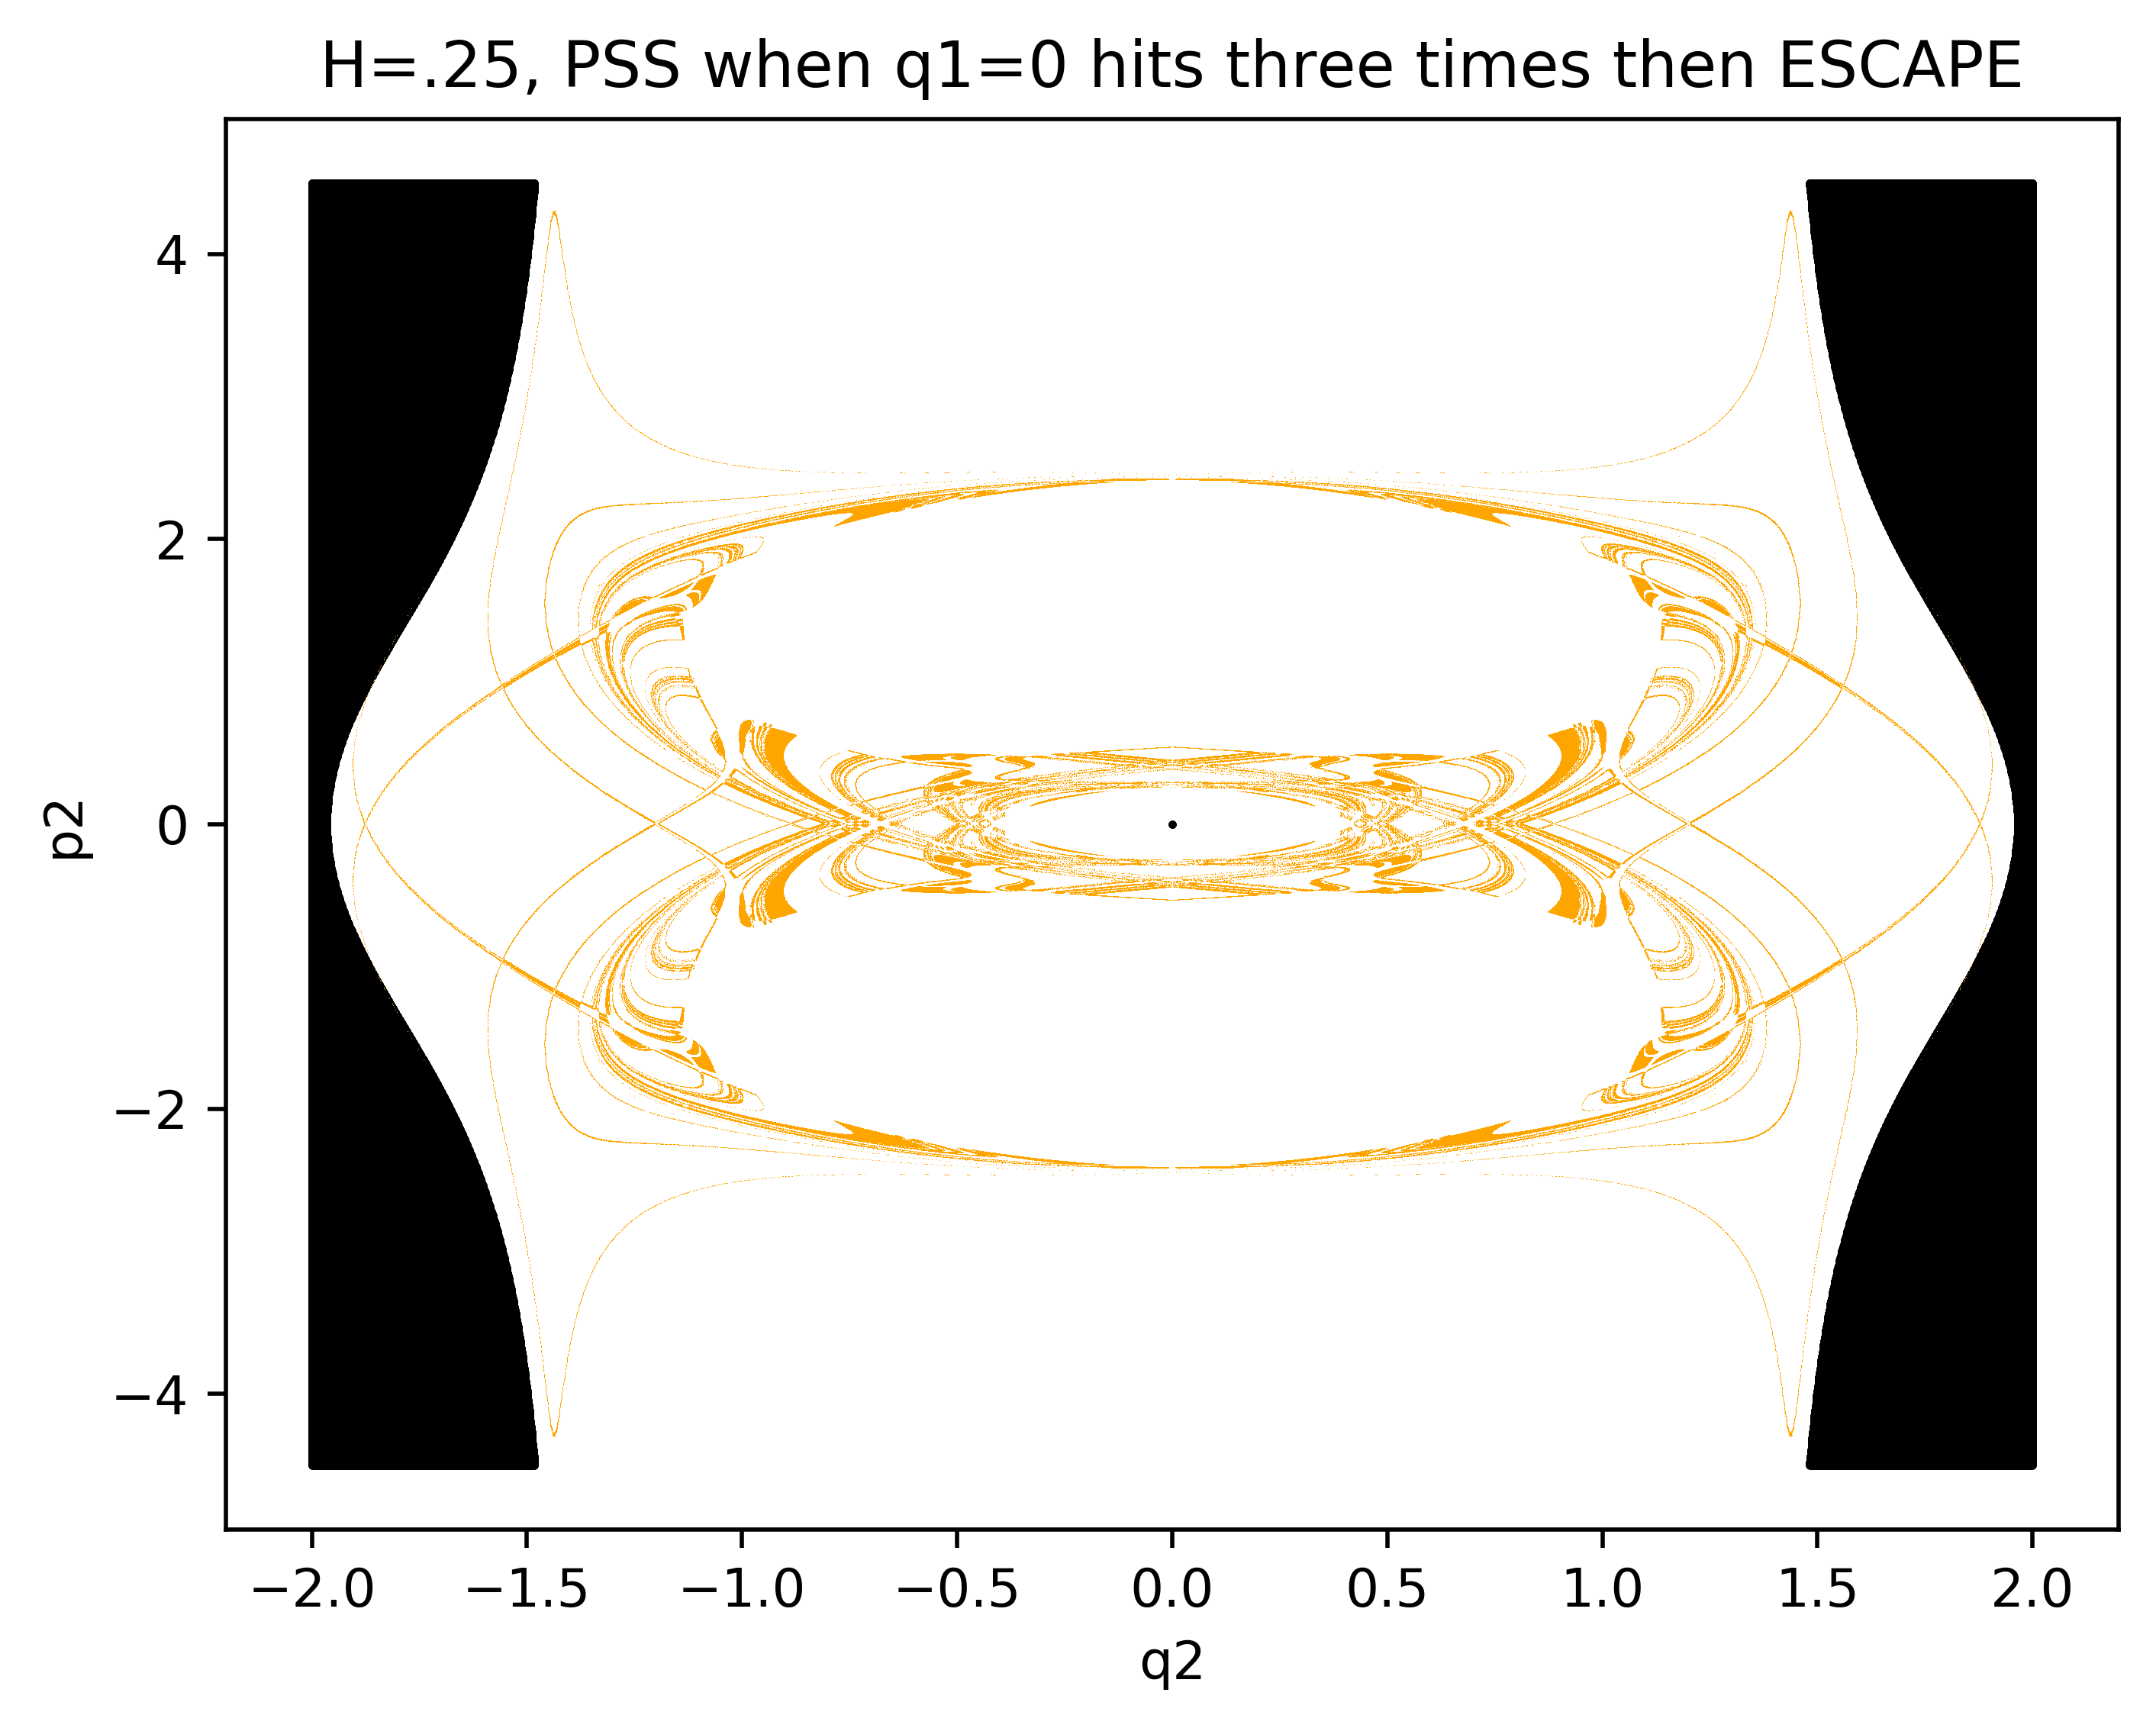

PyObject Text(0.5, 1, 'H=.25, PSS when q1=0 hits three times then ESCAPE')

In [7]:
figure(dpi=500)

plot(Q_n,P_n, ".",markersize=1,c="k")
plot(Q_3,P_3, ",", c=:orange)

xlabel("q2")
ylabel("p2")
title("H=.25, PSS when q1=0 hits three times then ESCAPE")

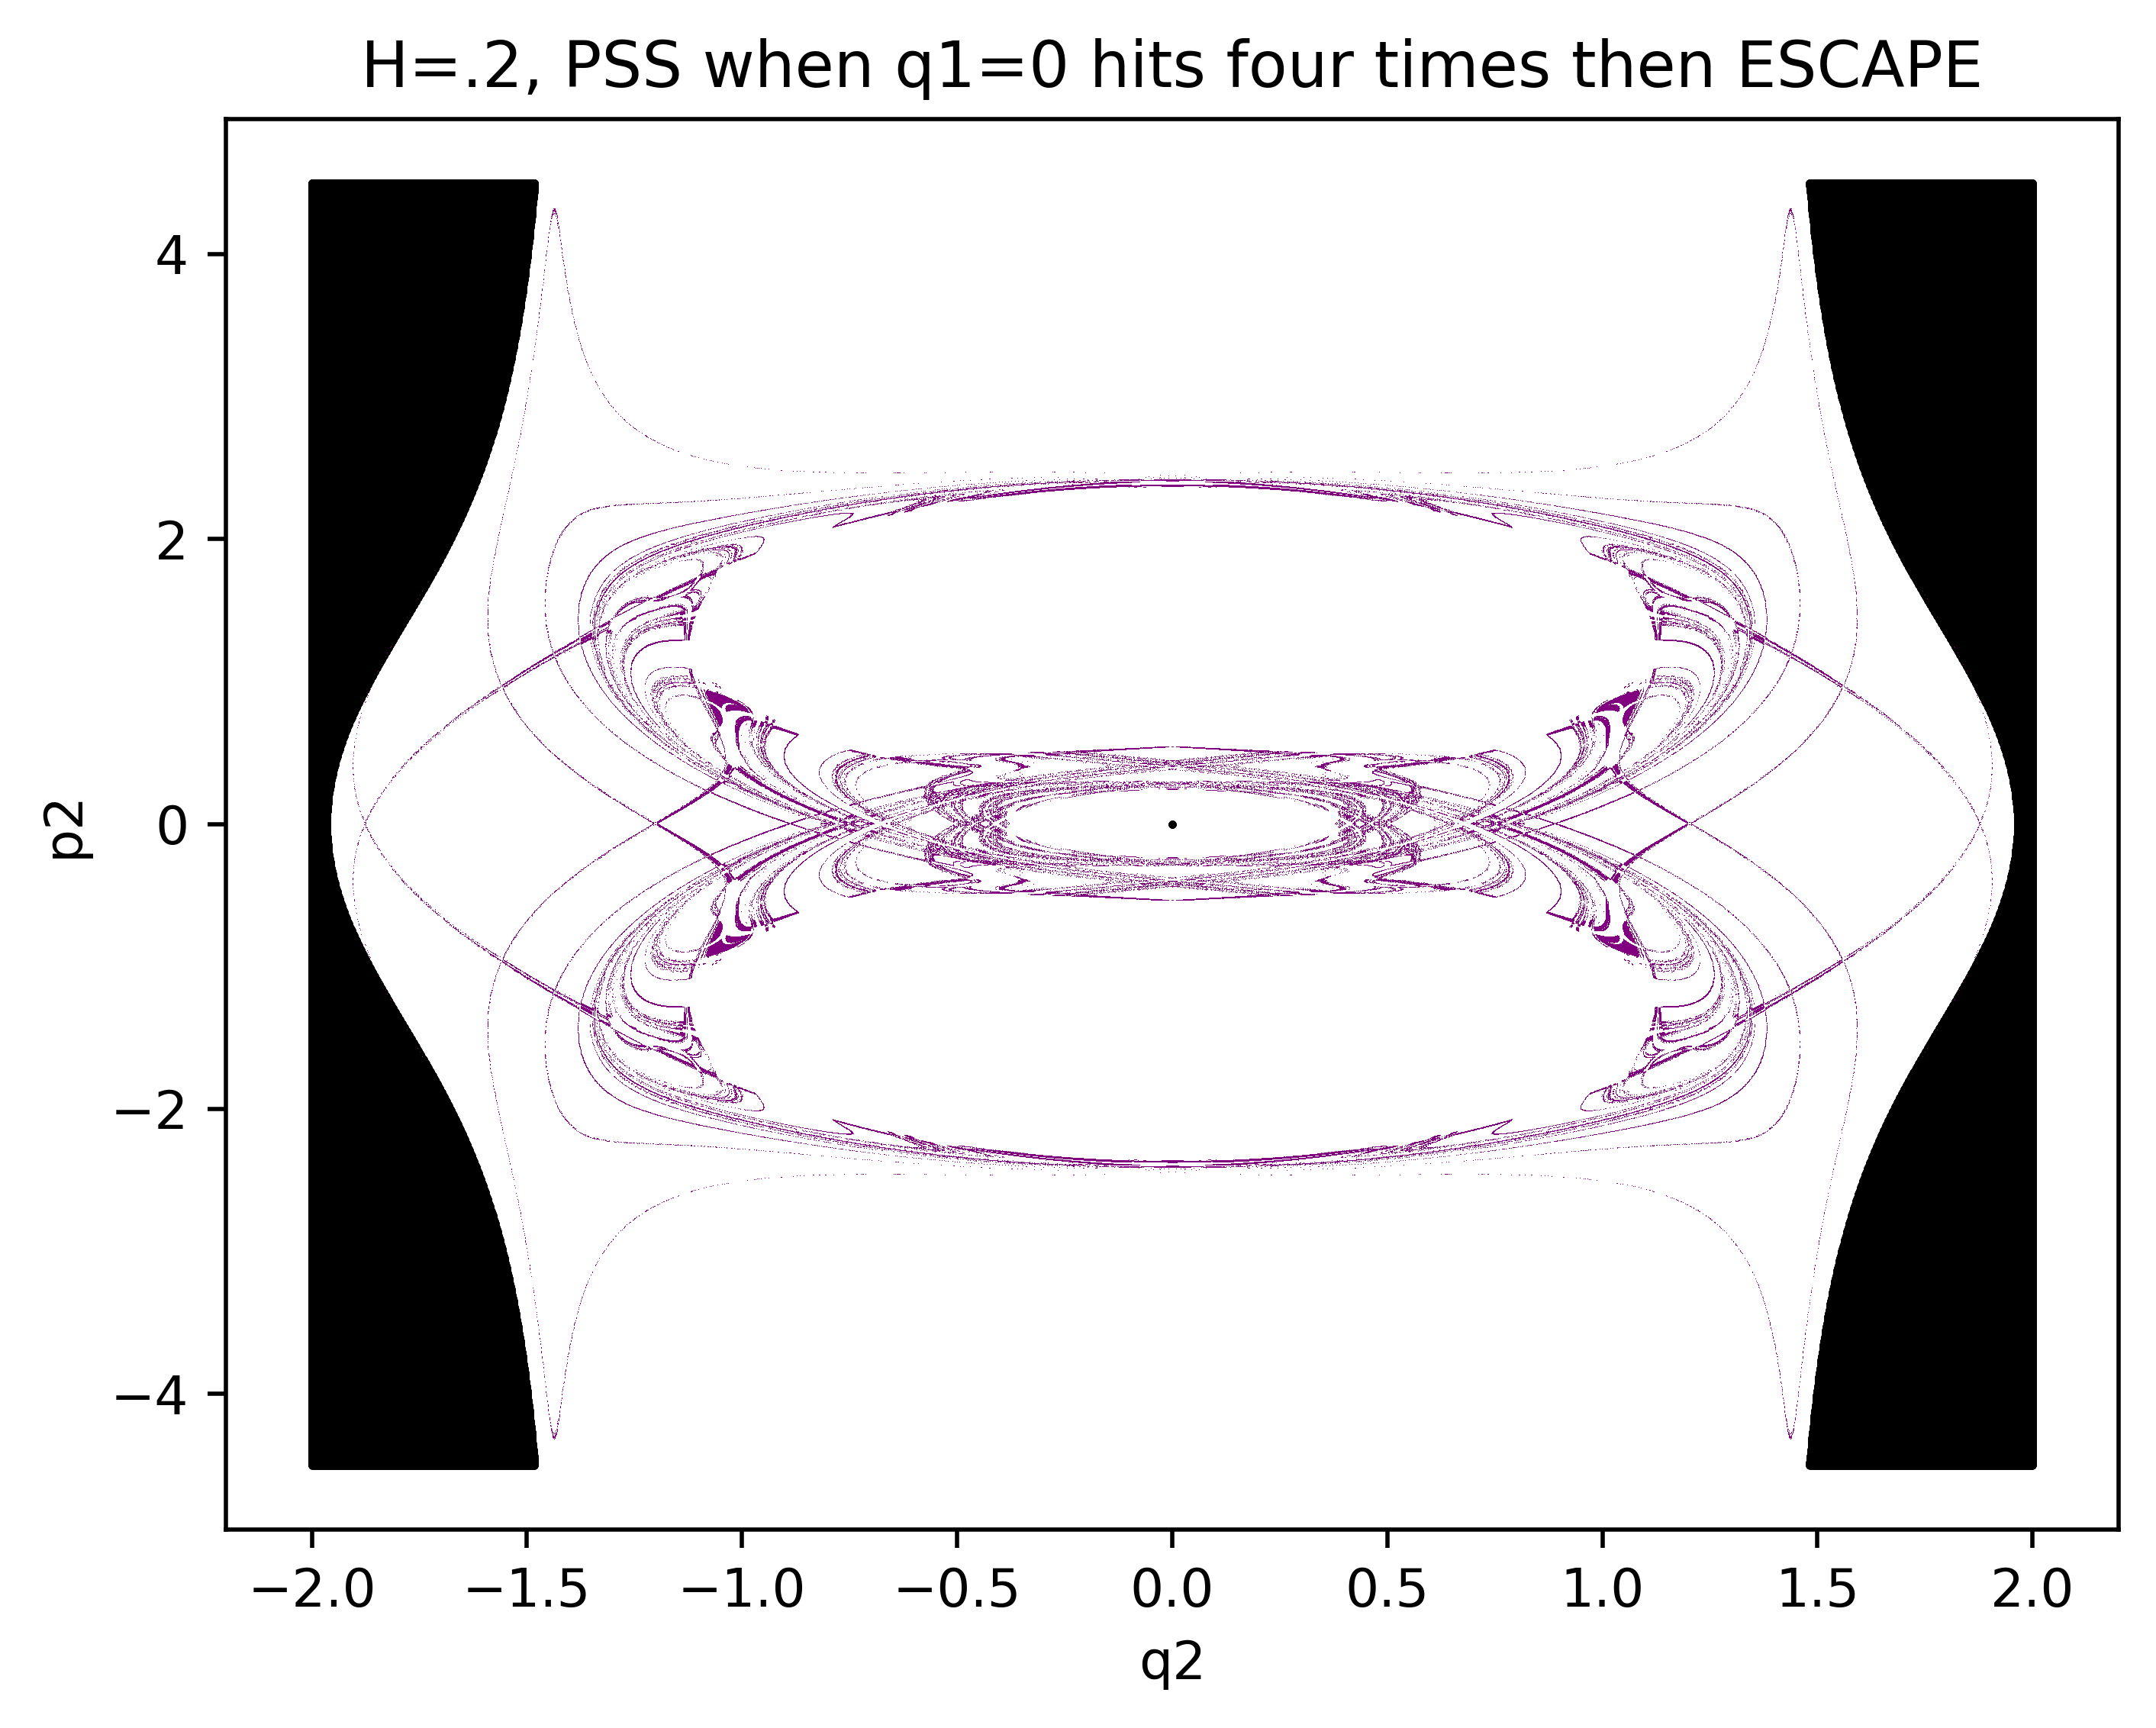

In [8]:
figure(dpi=500)

plot(Q_n,P_n, ".",markersize=1,c="k")
plot(Q_4,P_4, ",", c=:purple)

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits four times then ESCAPE");

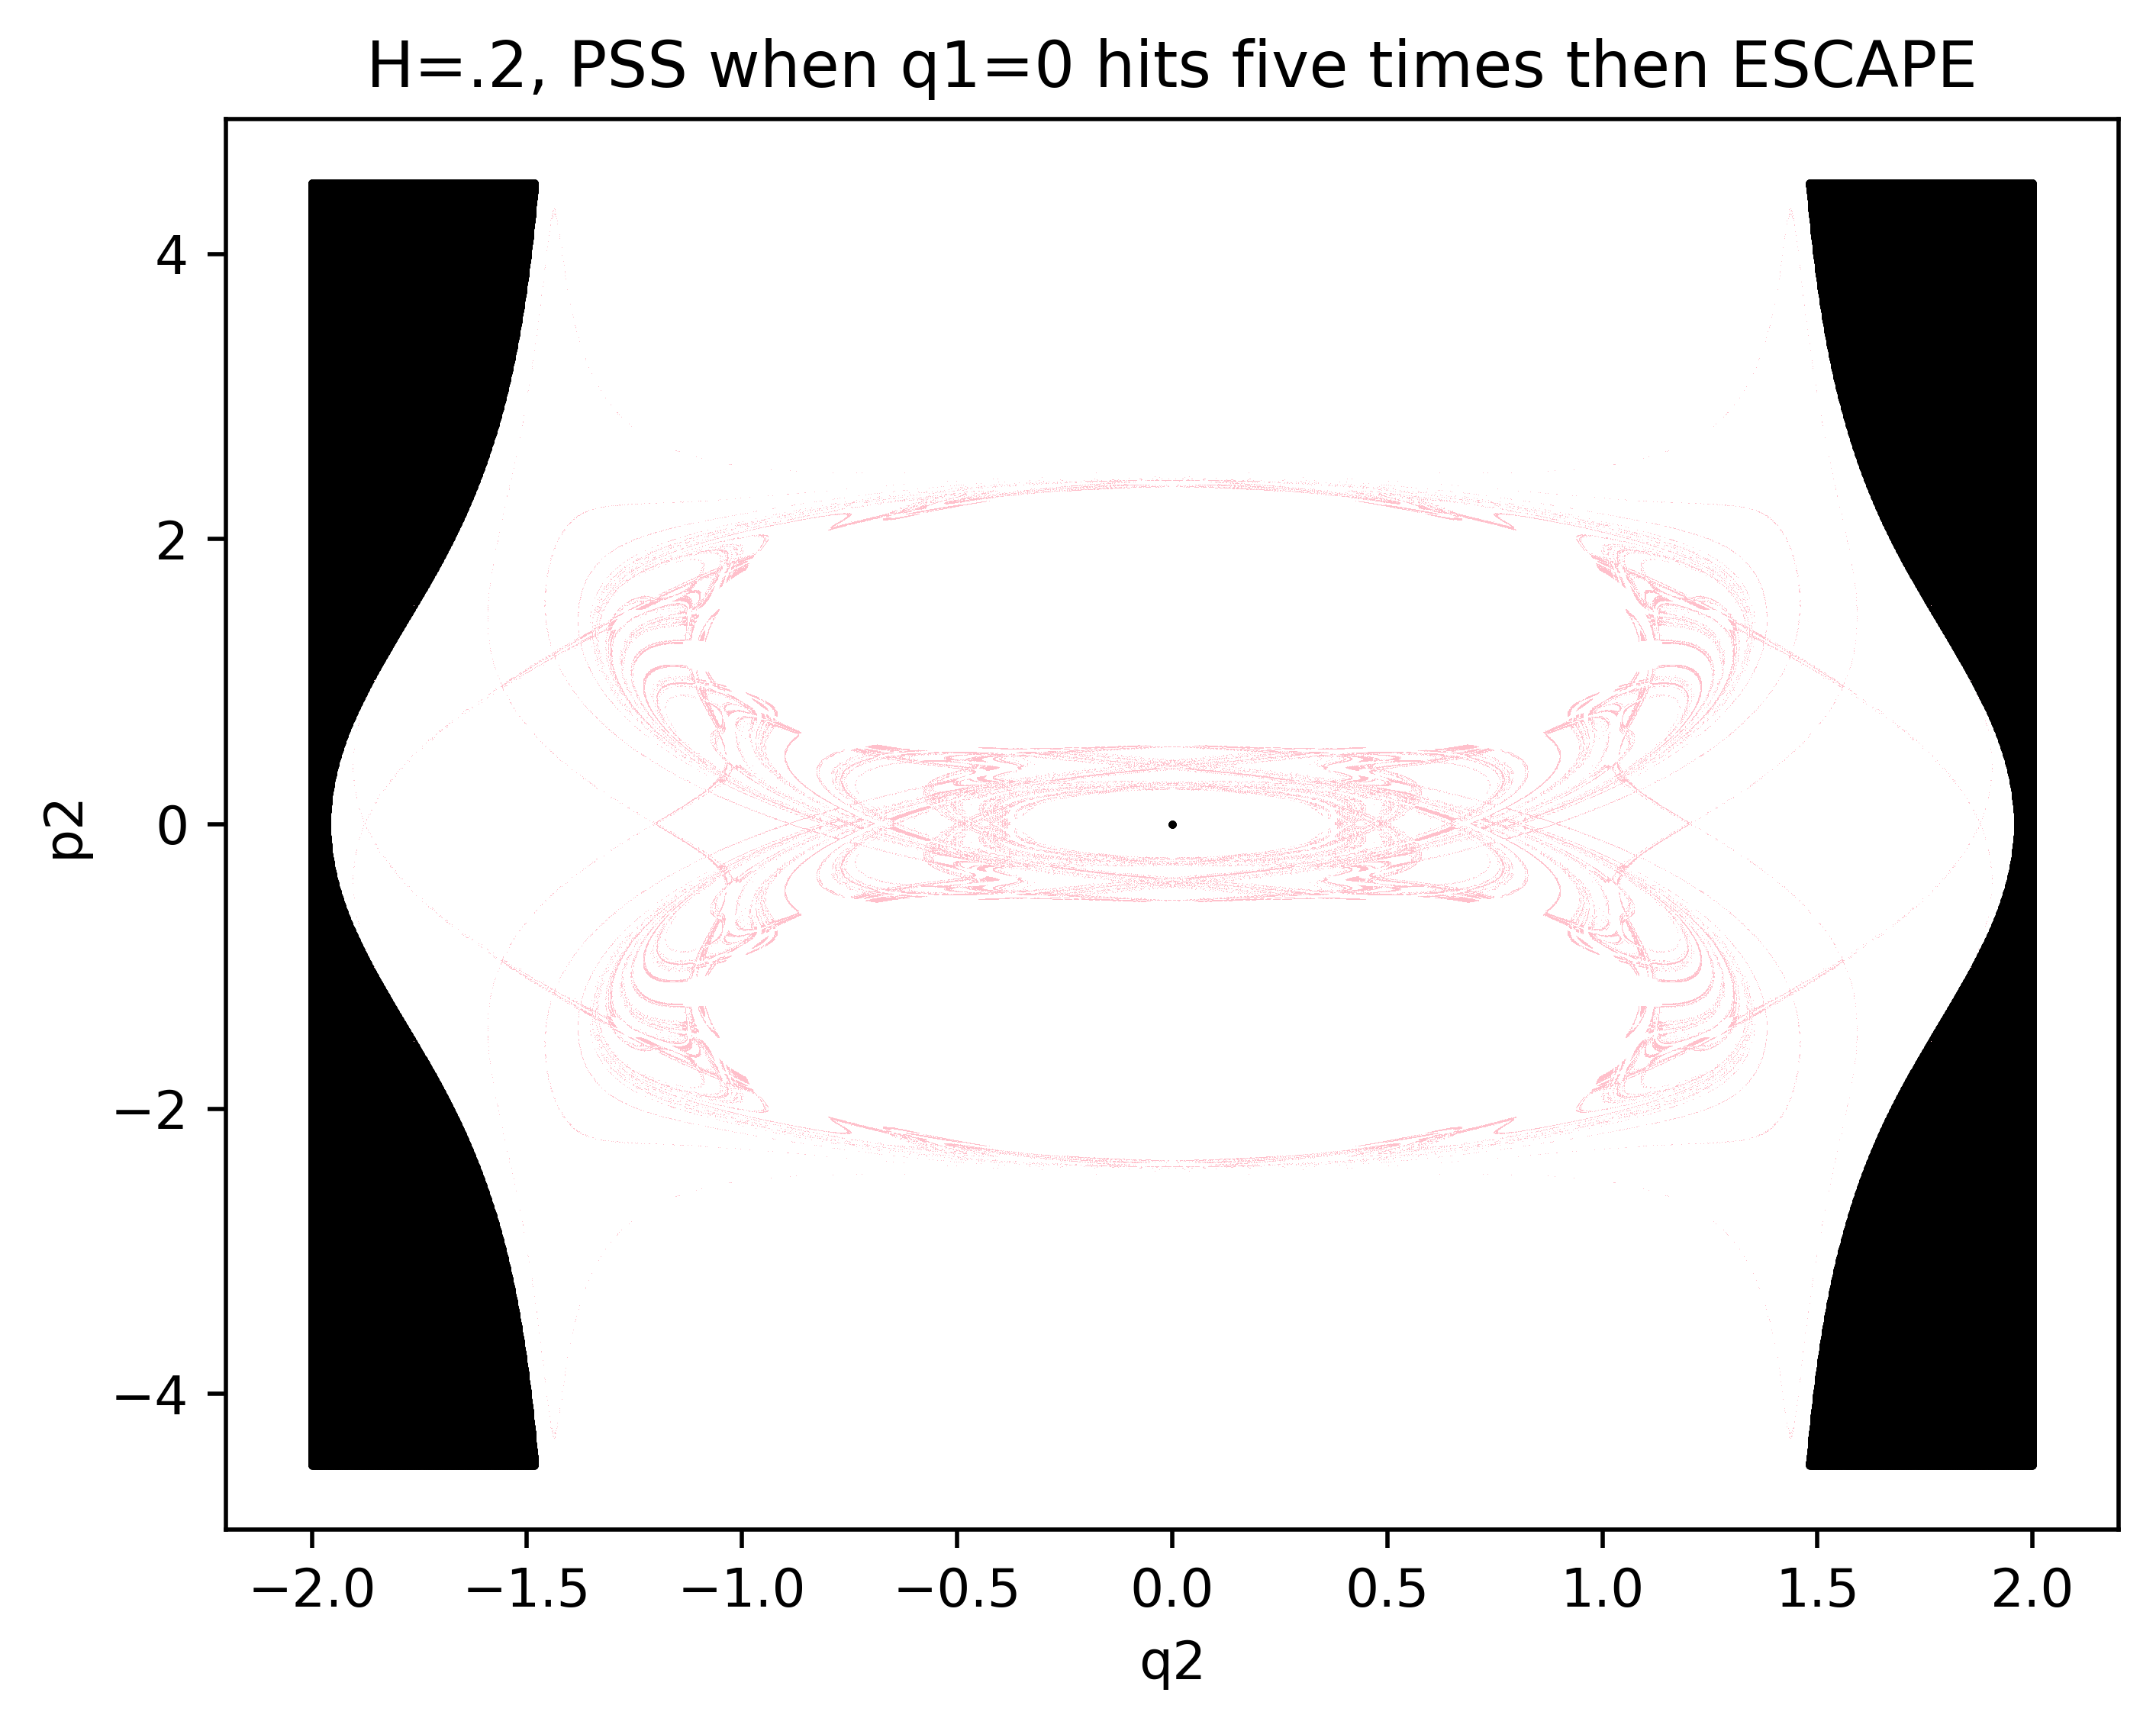

In [9]:
figure(dpi=500)

plot(Q_n,P_n, ".",markersize=1,c="k")
plot(Q_5,P_5, ",", c=:pink)

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits five times then ESCAPE");

In [ ]:
include("forward_one.jl")
@load "Hit_for_escape_data0_2500000000000_150_338.bson" SAVE_DATA
# Q_n,P_n=SAVE_DATA["never"]
# Q_0,P_0=SAVE_DATA["zero"]
# Q_1,P_1=SAVE_DATA["one"]
# Q_2,P_2=SAVE_DATA["two"]
# Q_3,P_3=SAVE_DATA["three"]
# Q_4,P_4=SAVE_DATA["four"];
# Q_5,P_5=SAVE_DATA["five"];


new_forward1=[]
t_end=1e3
H=.25
@showprogress for k in 1:length(Q_1)
    forward_point=forward_one(Q_1[k], P_1[k], t_end, H)
    if forward_point!=nothing
        push!(new_forward1,forward_point)
    end
end

Progress:   2%|▉                                        |  ETA: 9:25:05m43m

In [ ]:
# figure(dpi=500)
Q_1f,P_1f=unzipper2(new_forward1)
plot(Q_1f,P_1f, ".",markersize=.1,c=:red);
# plot(Q_1,P_1, ".",markersize=.1, c=:blue)

ylim(-4.2,4.2)

In [ ]:
include("back_one.jl")
new_backward1=[]
t_end=1e3
H=.25
@showprogress for k in 1:length(Q_1)
    back_point=back_one(Q_1[k], P_1[k], t_end, H)
    if back_point!=nothing
        push!(new_backward1,back_point)
    end
end
# new_backward1

In [ ]:
figure(dpi=500)
plot(Q_1f,P_1f, ",",c=:red);
Q_1b,P_1b=unzipper2(new_backward1)
plot(Q_1b,P_1b, ",",c=:black);
# plot(Q_1,P_1, ".",markersize=.1, c=:blue)

ylim(-4.2,4.2)


In [ ]:
include("forward_one.jl")
# @load "Hit_back_for_escape_data0_2500000000000_1007_507.bson" SAVE_DATA
new_back_forward1=[]
t_end=1e5
H=.25
@showprogress for k in 1:length(Q_1b)
    forward_point=forward_one(Q_1b[k], P_1b[k], t_end, H)
    if forward_point!=nothing
        push!(new_back_forward1,forward_point)
    end
end

In [ ]:
Q_1bf,P_1bf=unzipper2(new_back_forward1)
plot(Q_1bf,P_1bf, ".",markersize=.1,c=:black);
# plot(Q_1,P_1, ".",markersize=.1,c=:green);

ylim(-4.2,4.2)

In [ ]:
new_forward_back1=[]
t_end=1e5
H=.25
@showprogress for k in 1:length(Q_1fb)
    forward_point=back_one(Q_1fb[k], P_1fb[k], t_end, H)
    if forward_point!=nothing
        push!(new_forward_back1,forward_point)
    end
end

In [ ]:
figure(dpi=250)
Q_1fb,P_1fb=unzipper2(new_forward_back1)
# # plot(Q_1,P_1, ".",markersize=.1,c=:green);
plot(Q_1fb,P_1fb, ".",markersize=.1,c=:black);
# plot(Q_1bf,P_1bf, ".",markersize=.1,c=:black);
# figure(dpi=250)
plot(Q_1,P_1, ",",markersize=1,c=:green);
# plot(Q_1b,P_1b, ",",markersize=.1,c=:black);
# plot(Q_1f,P_1f, ",",markersize=.1,c=:black);
ylim(-4.2,4.2)

In [ ]:
@load "escape_TIME_cdata0_250000003000.bson" SAVE_DATA
time_to_exit=SAVE_DATA["escape_times"]
ArrP=SAVE_DATA["ArrP"]
ArrQ=SAVE_DATA["ArrQ"]

In [ ]:
figure(dpi=500)
pcolormesh(ArrP,ArrQ,log1p.(time_to_exit))
pcolormesh(reverse(ArrP),-ArrQ,log1p.(time_to_exit))
colorbar()

In [ ]:
figure(dpi=500)
contourf(ArrP,ArrQ,time_to_exit)
contourf(reverse(ArrP),-ArrQ,time_to_exit)
colorbar()